In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = ""

## Function to show the image in the jupyter-notebook with matplotlib

In [13]:
def imshow(title, image, figsize=(5,5)):
    # Matplotlib funciona con RGB, mientras que OpenCV trabaja con BGR.
    plt.figure(figsize=figsize)
    img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.show()

## Create a gray image

In [6]:
def myGray(img):
    gray = np.zeros(img.shape[:2], dtype='uint8')
    height, width = img.shape[:2]
    for i in range(height):
        for j in range(width):
            gray[i,j] = np.mean(img[i,j])
    return gray

## Load the cascade classifier *haar_face.xml* to try a simple face detection

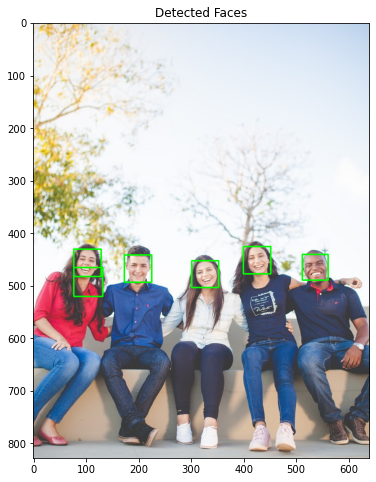

In [16]:
img = cv.imread(path+"Photos/group_2.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#cv.imshow("Person", img)
#cv.imshow("Gray", gray)

haar_cascade = cv.CascadeClassifier(path+'haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

imshow("Detected Faces", img, figsize=(8,8))

# Face Detection during a Video 

The output will be executed outside the jupyter-notebook

In [18]:
video = cv.VideoCapture(0)

haar_cascade = cv.CascadeClassifier(path+'haar_face.xml')

print("Press 'q' to exit the video.")

while True:
    ret, img = video.read()
    
    # convert image to gray scale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # detect faces with the cascade classifier
    faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # draw rectangles in the detected faces
    for (x,y,w,h) in faces_rect:
        cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
    
    cv.imshow('Javier Abollado', img)
    
    if cv.waitKey(1) & 0xFF == ord("q"):
        video.release()
        cv.destroyAllWindows()
        break
        

Press 'q' to exit the video.
